# <font color=black> =============================================== </font>
#### <font color=blue> EXTRACT <font color=red> **NEW** </font> **location.lst** file </font>

In [1]:
import tarfile
#
path='/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/NZ_location.lst/New_location.lst/'
filename='newGPS.tar.gz'
#
with tarfile.open(path+filename, "r:gz") as tar:
    tar.extractall("XtractD_files_"+filename.split('.')[0].split('_')[0])

In [2]:
#
XtractD_folder=path+"XtractD_files_"+filename.split('.')[0].split('_')[0]
!ls -la $XtractD_folder*/* #shows data within subfolders.

total 1459
drwxr-xr-x 2 pk695 pk695   4096 Feb 13 18:31 .
drwxr-xr-x 3 pk695 pk695   4096 Feb 16 11:39 ..
-rw-r--r-- 1 pk695 pk695    185 Feb 13 18:31 cre8DATA.sh
-rw-r--r-- 1 pk695 pk695    120 Feb 13 17:28 ._.DS_Store
-rw-r--r-- 1 pk695 pk695   6148 Feb 13 17:28 .DS_Store
-rw------- 1 pk695 pk695    227 Feb 13 18:31 ._NZ_2km.txt
-rw------- 1 pk695 pk695 613613 Feb 13 18:31 NZ_2km.txt
-rw-r--r-- 1 pk695 pk695 213896 Feb 13 18:31 NZInsarGPS1_verticallandmotion_preprocess_data.tgz
-rw------- 1 pk695 pk695    227 Feb 14 13:52 ._NZ_with_islands_VLM-v2.txt
-rw------- 1 pk695 pk695 613613 Feb 14 13:52 NZ_with_islands_VLM-v2.txt


# <font color=black>==============================================================</font>
# <font color=blue> RE-Create <font color=red> **location.lst** </font> for NZInsarGPS1 module </font>

In [5]:
import numpy as np
import re

# Initialize lists to hold data
qfmin = 5
iDs = []
lats = []
lons = []
vlm_rates = []
sigmas = []
npts = []
qfs = []
mndist = []

FILENAME  = 'NZ_with_islands_VLM-v2.txt'
PATH      ='/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/NZ_location.lst/New_location.lst/XtractD_files_newGPS/newGPS/'

# Name of the VLM data file
with open(PATH+FILENAME, 'r') as f:

    # Skip the header line
    line = f.readline()

    # Loop through the lines
    for line in f:

        # Strip the white space off the end of the line
        line.rstrip()

        # Get the pieces of data from the line
        lp = re.split("\s+", line)

        # Assign the data to their respective lists
        this_qf = float(lp[6])
        if(this_qf <= qfmin):
            iDs.append(float(lp[0]))
            lons.append(float(lp[1]))
            lats.append(float(lp[2]))
            vlm_rates.append(float(lp[3]))
            sigmas.append(float(lp[4]))
            npts.append(float(lp[5]))
            qfs.append(this_qf)
            mndist.append(float(lp[7]))

# Convert lists to numpy arrays
iDs = np.array(iDs)
lons = np.array(lons)
lats = np.array(lats)
vlm_rates = np.array(vlm_rates)
sigmas = np.array(sigmas)
npts = np.array(npts)
qfs = np.array(qfs)
mndist = np.array(mndist)

In [6]:
# save the file as txt file with NAME and ID (match location.lst)
#
with open("latlon_basedON_NZ_with_islands_VLM-v2_.txt", "w") as file:
    count = 3000000000
    for i in range(len(lats)):
        lat_r = round(lats[i], 1)
        lon_r = round(lons[i], 1)
        grid_lat_lon = "grid_{}_{}".format(lat_r,lon_r)
        file.write(grid_lat_lon + "\t" + str(count) + "\t" + str(lats[i]) + "\t" + str(lons[i]) + "\n")
        count += 10

#### <font color=black> -----------------------> </font>
#### <font color=blue> PLOT <font color=red> **ALL LOCATIONS** </font>

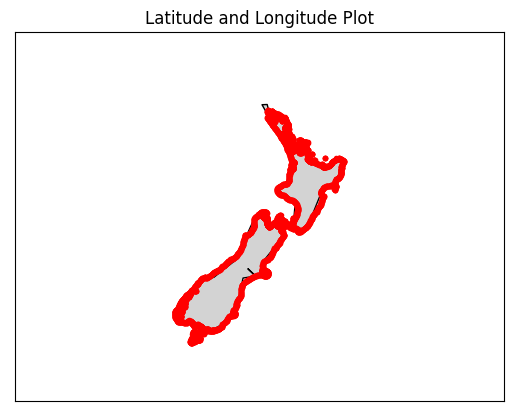

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# longitude = d_nc['lon'].to_dataframe().values.tolist()
# latitude = d_nc['lat'].to_dataframe().values.tolist()

longitude = lons
latitude  = lats

# Latitude and longitude values for NZ
min_lon = 155.0
max_lon = 190.0
min_lat = -50.0
max_lat = -30.0

# Create the map
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.scatter(longitude, latitude, latlon=True, marker='.', color='red', zorder=5)

plt.title("Latitude and Longitude Plot")


plt.show()

# <font color=black>==============================================================</font>
# <font color=blue> CPMPARE <font color=red> **location.lst** </font>  </font>

In [ ]:
# # with open("latlon.txt", "r") as file1, open("latlon_basedON_2kmNZInsar_IPdata_.txt", "r") as file2:
# with open("latlon_basedON_gregNZ_OP_.txt", "r") as file1, open("latlon_basedON_2kmNZInsar_IPdata_.txt", "r") as file2:
#     file1_contents = file1.read()
#     file2_contents = file2.read()
#     if file1_contents == file2_contents:
#         print("The files are the same.")
#     else:
#         print("The files are different.")